Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               batch_size=batch_size,
                                                               color_mode='rgb',image_size=(img_height, img_width),shuffle=True,
                                                               validation_split=0.2,subset='training',
                                                               seed=123)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             batch_size=batch_size,
                                                             color_mode='rgb',image_size=(img_height, img_width),shuffle=True,
                                                             validation_split=0.2,subset='validation',
                                                             seed=123)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

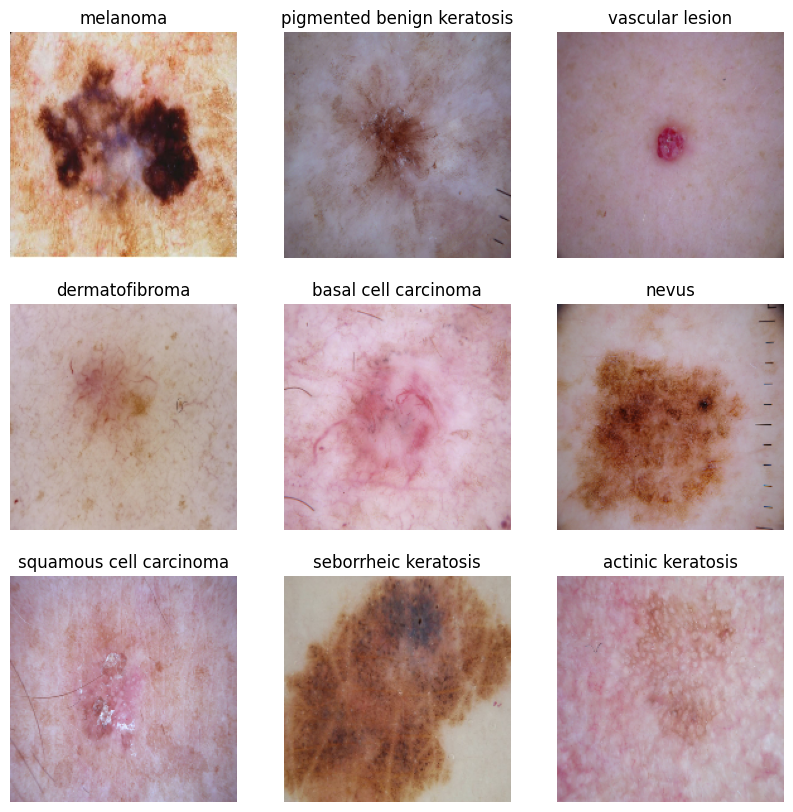

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
unique_list = []
unique_list_len = 0
plt.figure(figsize = (10,10))
for image, image_label in val_ds.as_numpy_iterator():
    for index in range(32):
        if image_label[index] not in unique_list:
            unique_list.append(image_label[index])
            unique_list_len += 1
            plt.subplot(3,3,unique_list_len)
            # display label of image
            plt.title(class_names[image_label[index]])
            # display image
            plt.imshow(image[index].astype('uint8'))
            plt.axis('off')
        elif len(unique_list) == 9:
          break
        if len(unique_list) == 9:
          break

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
num_classes = 9

model = tf.keras.Sequential([
  # Rescale data to standardize values between range [0,1]
  tf.keras.layers.Rescaling(1./255),

  # Convolutional Layer 1
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
  # Pooling layer
  tf.keras.layers.MaxPooling2D(),

  # Convolutional Layer 2
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(),

  # Convolutional Layer 3
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(),

  # Flatten Layer
  tf.keras.layers.Flatten(),
  # Dense Layer
  tf.keras.layers.Dense(128, activation='relu'),

  # Dense Layer with softmax for classification
  tf.keras.layers.Dense(num_classes, activation='softmax')
])


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [13]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 363s 125ms/step - loss: 1.9477 - accuracy: 0.2879 - val_loss: 1.6352 - val_accuracy: 0.4228
Epoch 2/20
56/56 [==============================] - 2s 28ms/step - loss: 1.6538 - accuracy: 0.4118 - val_loss: 1.6956 - val_accuracy: 0.3937
Epoch 3/20
56/56 [==============================] - 2s 28ms/step - loss: 1.5298 - accuracy: 0.4565 - val_loss: 1.5075 - val_accuracy: 0.4966
Epoch 4/20
56/56 [==============================] - 2s 28ms/step - loss: 1.3656 - accuracy: 0.5307 - val_loss: 1.3859 - val_accuracy: 0.5391
Epoch 5/20
56/56 [==============================] - 2s 28ms/step - loss: 1.3038 - accuracy: 0.5446 - val_loss: 1.3435 - val_accuracy: 0.5436
Epoch 6/20
56/56 [==============================] - 2s 28ms/step - loss: 1.2063 - accuracy: 0.5731 - val_loss: 1.4171 - val_accuracy: 0.5190
Epoch 7/20
56/56 [==============================] - 2s 28ms/step - loss: 1.1854 - accuracy: 0.5703 - val_loss: 1.4718 - val_accuracy: 0.4966
Epoch 8/20

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Visualizing training results

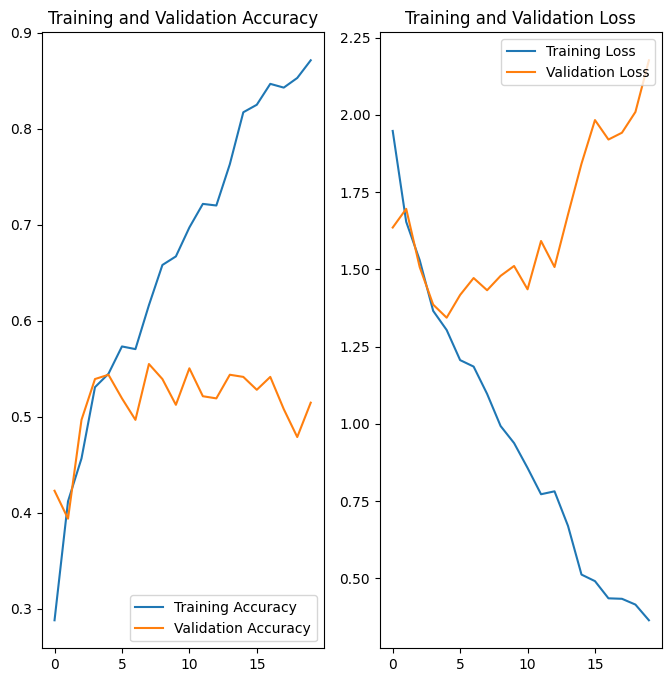

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

*   There is a notable difference between Training and Validation Accuracy after 20 epochs. This clearly explains model Overfit
*   We can also observe Validation loss increased after few epochs in data.This explains that model is unable to classify images to it's category


In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
augmentation = tf.keras.Sequential([
    # horizontal flip
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",
                                                          input_shape=(img_height,img_width,3)),
    # Rotation
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    # Zoom
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

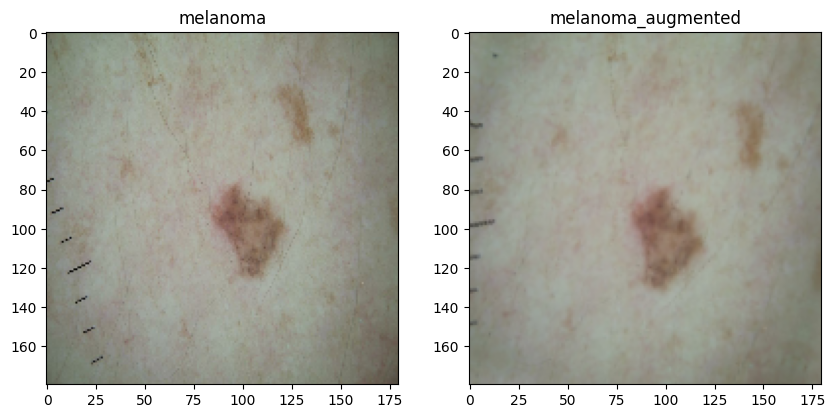

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10,10))
for image, image_label in train_ds.take(1).as_numpy_iterator():
    plt.subplot(1,2,1)
    plt.title(class_names[image_label[1]])
    # Old image
    plt.imshow(image[1].astype('uint8'))
    plt.subplot(1,2,2)
    plt.title(class_names[image_label[1]]+'_augmented')
    # Augmented image
    plt.imshow(augmentation(image)[1].numpy().astype('uint8'))

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9

model = tf.keras.Sequential([
  # rescale data to standardize values
  tf.keras.layers.Rescaling(1./255),
  # augmented images used
  augmentation,
  # Convolutional Layer 1
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
  # Pooling layer
  tf.keras.layers.MaxPooling2D(),

  # Convolutional Layer 2
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(),

  # Convolutional Layer 3
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(),

  # Flatten layer
  tf.keras.layers.Flatten(),
  # Dense Layer
  tf.keras.layers.Dense(128, activation='relu'),
  # dropout to handle overfit
  tf.keras.layers.Dropout(0.2),

  # dense layer with softmax
  tf.keras.layers.Dense(num_classes, activation='softmax')
])


### Compiling the model

In [19]:
## Your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
56/56 [==============================] - 7s 34ms/step - loss: 2.0038 - accuracy: 0.2478 - val_loss: 1.7522 - val_accuracy: 0.3691
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 1.6935 - accuracy: 0.3717 - val_loss: 1.6247 - val_accuracy: 0.4609
Epoch 3/20
56/56 [==============================] - 2s 31ms/step - loss: 1.5981 - accuracy: 0.4297 - val_loss: 1.9413 - val_accuracy: 0.3669
Epoch 4/20
56/56 [==============================] - 2s 30ms/step - loss: 1.5982 - accuracy: 0.4520 - val_loss: 1.4422 - val_accuracy: 0.5190
Epoch 5/20
56/56 [==============================] - 2s 30ms/step - loss: 1.4716 - accuracy: 0.4883 - val_loss: 1.4577 - val_accuracy: 0.5011
Epoch 6/20
56/56 [==============================] - 2s 32ms/step - loss: 1.4277 - accuracy: 0.5022 - val_loss: 1.3498 - val_accuracy: 0.5302
Epoch 7/20
56/56 [==============================] - 2s 32ms/step - loss: 1.3904 - accuracy: 0.5162 - val_loss: 1.4043 - val_accuracy: 0.5168
Epoch 8/20
56

### Visualizing the results

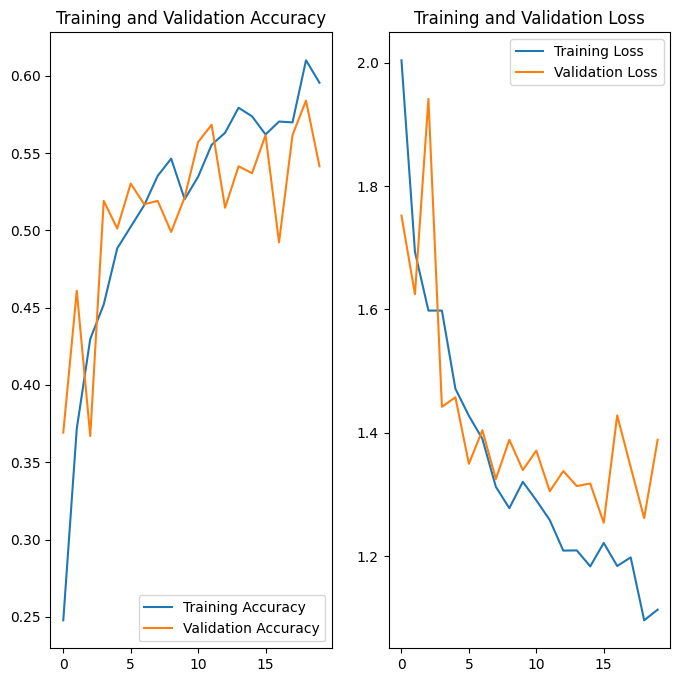

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

*   Although training accuracy is dropped, model got better after Augmentation and dropout as both Training and Validation Accuracy are in similar range after running for 20 epochs.
*   Overfit was managed now by using Dropout. But we have Underfit issue to be dealt to improve accuracy







#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

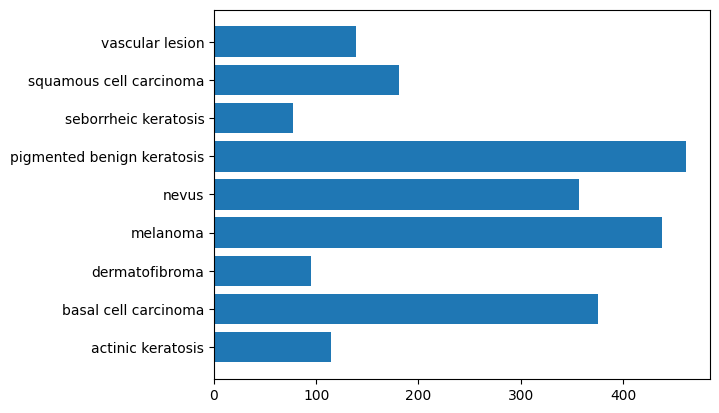

In [22]:
## Your code goes here.
class_count = []
for i in class_names:
    class_count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
# horizontal bar plot to visualise image label counts
plt.barh(class_names,class_count)
plt.show()

In [23]:
class_count_df = pd.DataFrame({
        'Class' : class_names,
        'Class_Count': class_count
})
class_count_df

,Class,Class_Count
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
*   **seborrheic keratosis**	have Least number of Samples

#### - Which classes dominate the data in terms proportionate number of samples?

*   **pigmented benign keratosis** followed by **melanoma**, **basal cell carcinoma** and **nevus** dominates in terms of number of samples compared to others




#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [24]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [25]:
path_to_training_dataset='/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F68E0503100>: 100%|██████████| 500/500 [00:22<00:00, 22.53 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F68F875B2B0>: 100%|██████████| 500/500 [00:25<00:00, 19.25 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F68F8E311E0>: 100%|██████████| 500/500 [00:24<00:00, 20.23 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F68E0449000>: 100%|██████████| 500/500 [01:54<00:00,  4.37 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F68F8101E10>: 100%|██████████| 500/500 [01:20<00:00,  6.19 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F68F8101030>: 100%|██████████| 500/500 [00:19<00:00, 26.06 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F68F8090940>: 100%|██████████| 500/500 [00:42<00:00, 11.79 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F68F80BD000>: 100%|██████████| 500/500 [00:19<00:00, 25.12 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F68E0503C70>: 100%|██████████| 500/500 [00:21<00:00, 23.57 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [26]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [27]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0029372.jpg_210a6506-e66e-4ce4-b739-89da3a0ed9bb.jpg',
 '/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027093.jpg_fbcb07b0-0033-45d0-8ad3-98c61eac424f.jpg',
 '/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0025576.jpg_fee1ffb6-0421-4b66-a859-988fd831c5ca.jpg',
 '/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0024829.jpg_481254b8-6dde-48aa-9b2e-634cf0020098.jpg',
 '/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_orig

In [28]:
len(path_list)

4500

In [29]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
from collections import Counter
# check lesion_list_new data
Counter(lesion_list_new)

Counter({'basal cell carcinoma': 500,
         'dermatofibroma': 500,
         'squamous cell carcinoma': 500,
         'nevus': 500,
         'actinic keratosis': 500,
         'pigmented benign keratosis': 500,
         'vascular lesion': 500,
         'seborrheic keratosis': 500,
         'melanoma': 500})

In [30]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [31]:
Counter(dataframe_dict_new.values())

Counter({'basal cell carcinoma': 500,
         'dermatofibroma': 500,
         'squamous cell carcinoma': 500,
         'nevus': 500,
         'actinic keratosis': 500,
         'pigmented benign keratosis': 500,
         'vascular lesion': 500,
         'seborrheic keratosis': 500,
         'melanoma': 500})

In [32]:
path_list = []
label_list = []
for i in class_names:
    for j in data_dir_train.glob(i+'/*.jpg'):
        label_list.append(i)
        path_list.append(str(j))

In [33]:
# check old data counts
Counter(label_list)

Counter({'actinic keratosis': 114,
         'basal cell carcinoma': 376,
         'dermatofibroma': 95,
         'melanoma': 438,
         'nevus': 357,
         'pigmented benign keratosis': 462,
         'seborrheic keratosis': 77,
         'squamous cell carcinoma': 181,
         'vascular lesion': 139})

In [34]:
original_df = pd.DataFrame({
    'Path':path_list,
    'Label':label_list
})
original_df.shape

(2239, 2)

In [35]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# concat both dataframes
new_df = pd.concat([original_df,df2])

In [36]:
# check new dataframe counts after concat
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [37]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [38]:
# New train+output data is divided in to train and validation
data_dir_train='/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [40]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9

model = tf.keras.Sequential([
  # rescale data to standardize values between [0,1]
  tf.keras.layers.Rescaling(1./255),
  # use augmented images
  augmentation,

  # convolutional layer 1
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
  # pooling layer
  tf.keras.layers.MaxPooling2D(),

  # convolutional layer 2
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
  # pooling layer
  tf.keras.layers.MaxPooling2D(),

  # convolutional layer 3
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
  # pooling layer
  tf.keras.layers.MaxPooling2D(),

  # Flatten layer
  tf.keras.layers.Flatten(),
  # Data Normalization
  tf.keras.layers.Normalization(),
  # Dense layer with relu
  tf.keras.layers.Dense(128, activation='relu'),
  # dropout to handle overfit
  tf.keras.layers.Dropout(0.2),

  # dense layer with softmax for classification
  tf.keras.layers.Dense(num_classes, activation='softmax')
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [41]:
## your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [42]:
epochs = 30
## Your code goes here, use 30 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 42s 225ms/step - loss: 1.9801 - accuracy: 0.2341 - val_loss: 1.8501 - val_accuracy: 0.3096
Epoch 2/30
169/169 [==============================] - 42s 240ms/step - loss: 1.6610 - accuracy: 0.3626 - val_loss: 1.5688 - val_accuracy: 0.4232
Epoch 3/30
169/169 [==============================] - 40s 230ms/step - loss: 1.4898 - accuracy: 0.4358 - val_loss: 1.5623 - val_accuracy: 0.4091
Epoch 4/30
169/169 [==============================] - 42s 243ms/step - loss: 1.4652 - accuracy: 0.4401 - val_loss: 1.4955 - val_accuracy: 0.4462
Epoch 5/30
169/169 [==============================] - 37s 215ms/step - loss: 1.4089 - accuracy: 0.4629 - val_loss: 1.3120 - val_accuracy: 0.4907
Epoch 6/30
169/169 [==============================] - 38s 221ms/step - loss: 1.3434 - accuracy: 0.4815 - val_loss: 1.2547 - val_accuracy: 0.5174
Epoch 7/30
169/169 [==============================] - 43s 247ms/step - loss: 1.2889 - accuracy: 0.5045 - val_loss: 1.2146 - val_ac

#### **Todo:**  Visualize the model results

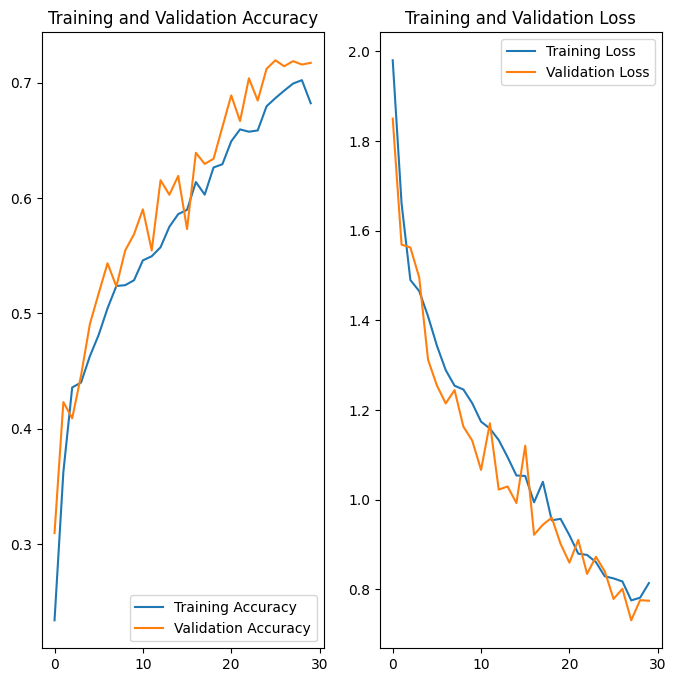

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?


*   Class rebalance helped to improve learning of the model
*   After rebalance and Normalization, Accuracy is improved which resolved underfit of model
*   After dropout, difference between Training and Validation Accuracy improved which resolved overfit of model


